In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
plt.rcParams["font.family"] = "Times New Roman"

In [82]:
imps = pd.read_csv('../../data/output/permutation_importances.csv',index_col=0)

In [83]:
imps.sort_values('mean',ascending=False, inplace=True)

imps_plot = imps.iloc[:25,:]

idx = list(imps_plot.index)

for i,name in enumerate(idx):
    name = name.split('|')[-1]
    name = '}$ $\it{'.join(name.split('_'))
    idx[i] = '$\it{'+name[1:]+'}$'

imps_plot['names'] = idx

/tmp/ipykernel_2216156/796150796.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imps_plot['names'] = idx


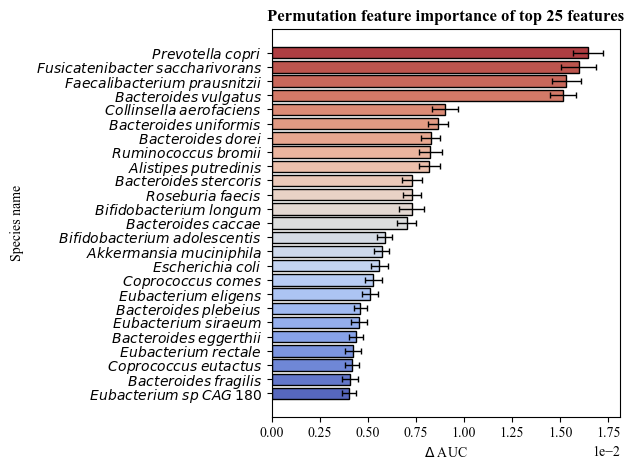

In [88]:
plt.figure()
sns.barplot(data = imps_plot, x='mean', y='names', errorbar='sd', palette = 'coolwarm_r',linewidth=1, edgecolor="0")
plt.errorbar(x=imps_plot['mean'], xerr=imps_plot['sd'],y=imps_plot['names'],color='black', linestyle = 'None',linewidth=1,capsize=2)

plt.title('Permutation feature importance of top 25 features',fontweight='bold')
plt.ylabel('Species name')
plt.xlabel('$\Delta$ AUC')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.tight_layout()
plt.savefig('../../figures/permutation_feat_imp.pdf')


In [23]:
microbiome = pd.read_csv('../../data/raw/curated_metagenomics/relative_abundance.csv',index_col=0).transpose()
metadata = pd.read_csv('../../data/raw/curated_metagenomics/metadata.csv',index_col='sample_id',low_memory=False)

# %% [markdown]
# For this example we will try to classify disease from healthy based on microbiome. Disease is classified as diseased (according to the original data) and BMI<16 | BMI=>30. These are the boundaries of severe underweight and obesity.
study_name = 'QinN_2014'

#get stool samples
metadata = metadata.loc[metadata.body_site == 'stool',:]

#Add obesity disease tags to disease BMI
to_change = metadata.BMI>=30
metadata.loc[to_change,'disease'] = 'obesity'

to_change = metadata.BMI<16
metadata.loc[to_change,'disease'] = 'severe_underweight'

#Add obesity disease tags to disease BMI
metadata = metadata.loc[metadata.BMI==metadata.BMI,:]

# Remove all disease NaNs
metadata = metadata.loc[metadata.disease=='healthy',:]

#
to_keep = metadata.age_category != 'newborn'
metadata = metadata.loc[to_keep,:]

# Get the overlapping set of samples between metadata and microbiome data
overlapping_samples = list(set(metadata.index) & set(microbiome.index))
microbiome= microbiome.loc[overlapping_samples,:]
metadata = metadata.loc[overlapping_samples,:]


base_metadata = metadata.loc[metadata.study_name != study_name,:]
base_microbiome = microbiome.loc[base_metadata.index,:]

target_metadata = metadata.loc[metadata.study_name == study_name,:]
target_microbiome = microbiome.loc[target_metadata.index,:]

# %% [markdown]
# Here the class labels and feature names are defined.


In [24]:

# %%
y = np.asarray( base_metadata.BMI,dtype=float)
y_target = np.asarray(target_metadata.BMI,dtype=float)